# Loading of Datasets

In [1]:
from utils import *
import pandas as pd
import numpy as np

# Getting all the processed data
combined_df = load_from_pickle("unprocessed_data") # Original and untouched

clustered_data_load= load_from_pickle("direct_clustered_data") # Clustering performed without applying PCA first
clustered_data_1= clustered_data_load["cir_data_pca"]

clustered_data_load2 = load_from_pickle("pca_clustered_data") # Clustering performed but WITH PCA applied first
clustered_data_2 = clustered_data_load2["cir_data_pca"]

dbscan_data_1 = load_from_pickle("8_features_DBSCAN_data") # DBSCAN with Method 1: Drop all CIR columns, then PCA
dbscan_data_2 = load_from_pickle("direct_PCA_DBSCAN_data")  # DBSCAN with Method 2: Apply PCA directly
dbscan_data_3 = load_from_pickle("unscaled_DBSCAN_data") # DBSCAN with Method 3: DF Without PCA

dataset_1 = load_from_pickle("dataset_1")
dataset_2 = load_from_pickle("dataset_2")
dataset_3 = load_from_pickle("dataset_3")
dataset_4 = load_from_pickle("dataset_4")

# Support Vector Machine (SVM)

Summary

The Radial Basis Function performed signficiantly better as compared to the Linear Function with a training and testing accuracy of 92.6% and 89.7% as compared to the linear's function's accuracy of 85.1% and 85.4%.

The Radial Basis Function also showed better F1-Scores than the Linear Function which suggests that a more accurate prediction/classification of LOS and NLOS data however, both functions displayed a huge difference in being able to classify NLOS data as according to their confusion matrix

## Dataset 4

Setting up the training and testing dataset with a 70:30 split.

In [8]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

# Select the features to be used for Support Vector Classification
X = dataset_4.drop(columns = 'NLOS')
Y = dataset_4[['NLOS']].to_numpy()
Y = Y.reshape(-1)

# Standardizing the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

# Split dataset into 70% training and 30% test
x_train, x_test, y_train, y_test = train_test_split(x_scaled, Y, test_size = 0.3, random_state = 12)

## Linear Function

In [9]:
# Create a SVM Classifier with the kernel of linear for linear hyperplane
clf = SVC(kernel = 'linear', gamma = 'auto', random_state = 12)

clf.fit(x_train, y_train)

y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

# Export model
save_to_pickle(f'{MODEL_FOLDER}/svm_linear_70_30.pkl', clf, complete_path=False)

### Classifier metrics for training dataset

In [10]:
# SVM (RBF) Model Performance for the Training Dataset
results = classifier_metrics(list(y_train), y_train_pred, print_results = True)

Accuracy: 0.8524489795918367
Precision: 0.859630607629706
Recall: 0.8526461071688007
F1 Score: 0.8517574582164911
Mean Squared Error (MSE): 0.14755102040816326
Matthews Correlation Coefficient (MCC): 0.7122424693862792
Cohen's Kappa: 0.7050126409970034
Hamming Loss: 0.14755102040816326

Confusion Matrix:
 [[13535  1124]
 [ 3214 11527]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.92      0.86     14659
         1.0       0.91      0.78      0.84     14741

    accuracy                           0.85     29400
   macro avg       0.86      0.85      0.85     29400
weighted avg       0.86      0.85      0.85     29400





### Classifier metrics for testing dataset

In [11]:
# SVM (RBF) Model Performance for the Testing Dataset
results = classifier_metrics(list(y_test), y_test_pred, print_results = True)

Accuracy: 0.8521428571428571
Precision: 0.859596962985223
Recall: 0.8516743049762324
F1 Score: 0.8512485032917522
Mean Squared Error (MSE): 0.14785714285714285
Matthews Correlation Coefficient (MCC): 0.7112271424218631
Cohen's Kappa: 0.7039995133616721
Hamming Loss: 0.14785714285714285

Confusion Matrix:
 [[5857  484]
 [1379 4880]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.92      0.86      6341
         1.0       0.91      0.78      0.84      6259

    accuracy                           0.85     12600
   macro avg       0.86      0.85      0.85     12600
weighted avg       0.86      0.85      0.85     12600





### Confusion Matrix of Training Dataset

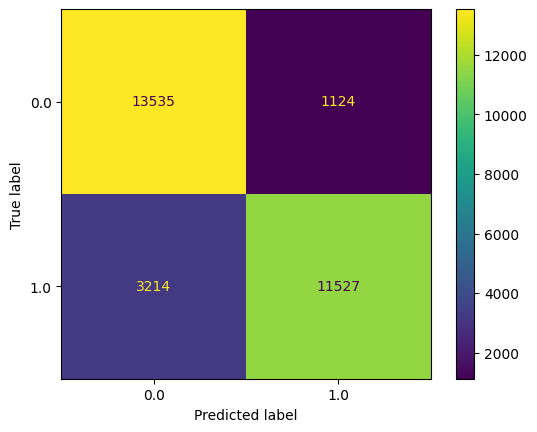

In [12]:
import matplotlib.pyplot as plt

predictions = clf.predict(x_train)
cm = confusion_matrix(y_train, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()
plt.show()

### Confusion Matrix of Testing Dataset

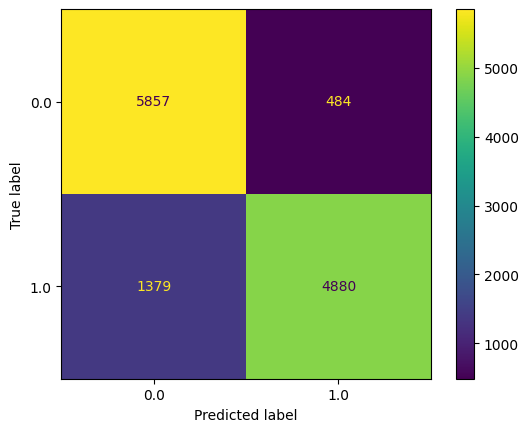

In [13]:
predictions = clf.predict(x_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()
plt.show()

## Kernel Function (Radial Basis Function)

In this case the kernel function that will be used for SVM is the Radial Basis function to create a hyperplane that is able to divide non-linear data by using the kernel function to transform it into a higher dimension.

In [3]:
# Create a SVM Classifier with the kernel of radial basis function (RBF) for non-linear hyperplane
clf = SVC(kernel = 'rbf', random_state = 12, gamma = 'auto')

# Train the model using the training sets
clf.fit(x_train, y_train)

# Predict the response for the train dataset
y_train_pred = clf.predict(x_train)

# Predict the response for the test dataset
y_test_pred = clf.predict(x_test)

# Export model
save_to_pickle(f'{MODEL_FOLDER}/svm_rbf_70_30.pkl', clf, complete_path=False)

### Classifier Metrics for Training Dataset

In [4]:
# SVM (RBF) Model Performance for the Training Dataset
results = classifier_metrics(list(y_train), y_train_pred, print_results = True)

Accuracy: 0.9255442176870748
Precision: 0.9276261249477162
Recall: 0.9256425864463317
F1 Score: 0.9254645807013674
Mean Squared Error (MSE): 0.07445578231292517
Matthews Correlation Coefficient (MCC): 0.8532664058891999
Cohen's Kappa: 0.8511167403492663
Hamming Loss: 0.07445578231292517

Confusion Matrix:
 [[14086   573]
 [ 1616 13125]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.96      0.93     14659
         1.0       0.96      0.89      0.92     14741

    accuracy                           0.93     29400
   macro avg       0.93      0.93      0.93     29400
weighted avg       0.93      0.93      0.93     29400





### Classifier Metrics for Testing Dataset

In [5]:
# SVM (RBF) Model Performance for the Testing Dataset
results = classifier_metrics(list(y_test), y_test_pred, print_results=True)

Accuracy: 0.8984126984126984
Precision: 0.900925740925741
Recall: 0.8981583976887506
F1 Score: 0.8982072946339112
Mean Squared Error (MSE): 0.10158730158730159
Matthews Correlation Coefficient (MCC): 0.7990793467464122
Cohen's Kappa: 0.796715149750526
Hamming Loss: 0.10158730158730159

Confusion Matrix:
 [[5943  398]
 [ 882 5377]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.94      0.90      6341
         1.0       0.93      0.86      0.89      6259

    accuracy                           0.90     12600
   macro avg       0.90      0.90      0.90     12600
weighted avg       0.90      0.90      0.90     12600





Confusion Matrix is a performance evaluation tool in machine learning, representing the accuracy of a classification model. It displays the number of true positives, true negatives, false positives, and false negatives. This matrix aids in analyzing model performance, identifying misclassifications, and improving predictive accuracy.

![alt text](https://av-eks-blogoptimized.s3.amazonaws.com/Basic-Confusion-matrix.png)

True Positive
- The predicted value matches the actual value, or the predicted class matches the actual class

True Negative
- The predicted value matches the actual value, or the predicted class matches the actual class

False Positive
- The predicted value was falsely predicted
- The actual value was negative, but the model predicted a positive value

False Negative
- The predicted value was falsely predicted
- The actual value was positive, but the model predicted a negative value

### Confusion Matrix for Training Dataset

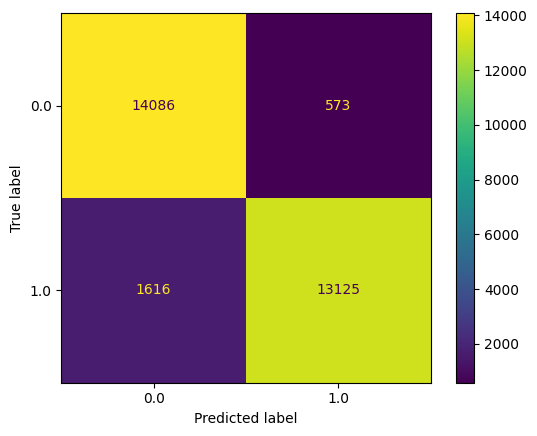

In [6]:
import matplotlib.pyplot as plt

predictions = clf.predict(x_train)
cm = confusion_matrix(y_train, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()
plt.show()

### Confusion Matrix for Testing Dataset

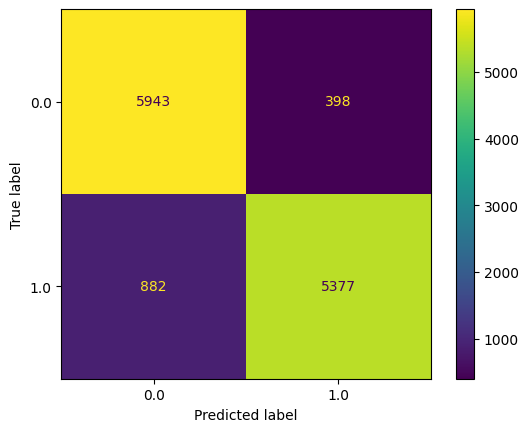

In [7]:
import matplotlib.pyplot as plt

predictions = clf.predict(x_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()
plt.show()